In [1]:
import stratMACDBoll
# import statements + autoreload #

%load_ext autoreload
%autoreload 2

import infrastructure as inf
import stratMACD
import executeStrats as strats

# MACD Backtest Data #
tl;dr-- ETC found to have most robust returns over all tradeable coins, and Sharpe Ratios of different MACD configurations found vastly superior to buy-and-hold strategy, with higher mean returns and lower volatility.

Interesting to note that coins with larger market caps (BTC, ETH, ADA, etc.) generally perform poorly with MACD. This could be due to the lower proportion of retail:institutional investments in these coins, though this would have to be investigated further.

### Ranked Coins (Over Past Year)
##### note: will take a while to run

In [2]:
# (4, 18, 3) #
print(stratMACD.rankCoins(1440, 4, 18, 3, index=365, trade_fee=.001))

               final
ETCUSD    255.374582
MATICUSD  195.797973
FLOWUSD   151.920015
KNCUSD    149.543847
QNTUSD    142.168418
...              ...
BNTUSD     -0.078910
XRPUSD     -0.080732
DAIUSD     -0.087501
CQTUSD     -0.095844
ANTUSD     -0.110729

[88 rows x 1 columns]


In [3]:
# (12, 26, 9) #
print(stratMACD.rankCoins(1440, 12, 26, 9, index=365, trade_fee=.001))

              final
ETCUSD   276.506307
UNIUSD   110.678924
MKRUSD   109.857646
TRXUSD   102.093250
PAXGUSD  101.752211
...             ...
CQTUSD    -0.119766
PERPUSD   -0.125960
DOGEUSD   -0.144937
SHIBUSD   -0.151773
KEEPUSD   -0.162632

[88 rows x 1 columns]


In [4]:
# (20, 40, 14) #
print(stratMACD.rankCoins(1440, 20, 40, 14, index=365, trade_fee=.001))

               final
SDNUSD    113.320723
KEEPUSD   112.685979
GNOUSD    105.714551
XRPUSD    100.057393
DAIUSD     94.631900
...              ...
STORJUSD   -0.127621
BALUSD     -0.127802
BANDUSD    -0.127815
ETCUSD     -0.151721
DOGEUSD    -0.200690

[88 rows x 1 columns]


### MACD Visualisations
##### (past year)

ETCUSD close (top) and MACD value (bottom)

C:\Users\jonat\PycharmProjects\tradingStrategies\stratMACD.py:227: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


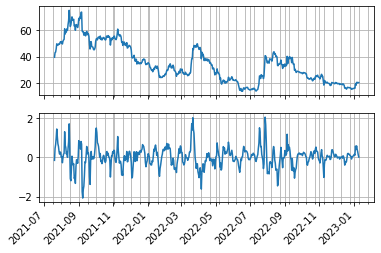

In [21]:
# (4, 18, 3) #
data1 = stratMACD.getMACDData('ETCUSD', 1440, 4, 18, 3).iloc[-540:]
stratMACD.plotMACD(data1)

C:\Users\jonat\PycharmProjects\tradingStrategies\stratMACD.py:227: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


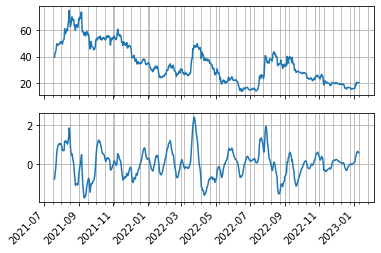

In [22]:
# (12, 26, 9) #
data2 = stratMACD.getMACDData('ETCUSD', 1440, 12, 26, 9).iloc[-540:]
stratMACD.plotMACD(data2)

### Sharpe Ratios of MACD ETCUSD Strategies + Histogram of Returns + Worst Month over past 1.5 Years
##### (aggregated monthly, then annualized)
##### With so few observations, Worst Month is a substitute for Max Drawdown (~.05)

           Mean       Vol    Sharpe
Strat  0.826829  0.983533  0.840672
Worst Month:  -0.205


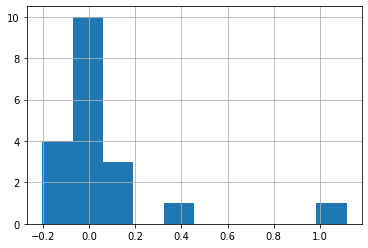

<Figure size 36x36 with 0 Axes>

In [50]:
# (4, 18, 3) #
results1 = stratMACD.backtestLongMACD(data1, trade_fee=.001)
print(inf.getSharpe(results1, '1M'))

temp1 = results1['% change'].iloc[2:] + 1
temp1 = temp1.resample('1M').prod() - 1

worst_month1 = round(temp1.min(),3)

print('Worst Month: ', worst_month1)
inf.plotHistogram(results1, '1M')

# view monthly returns with code below
# print((results1['% change']+1).resample('1M').prod()-1)

           Mean       Vol   Sharpe
Strat  0.797622  0.671178  1.18839
Worst Month:  -0.146


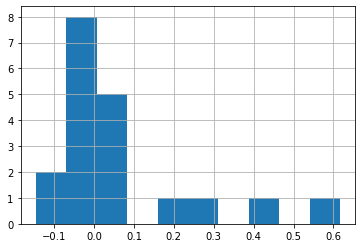

<Figure size 36x36 with 0 Axes>

In [57]:
# (12, 26, 9) #
results2 = stratMACD.backtestLongMACD(data2, trade_fee=.001)
print(inf.getSharpe(results2, '1M'))

temp2 = results2['% change'].iloc[2:] + 1
temp2 = temp2.resample('1M').prod() - 1

worst_month2 = round(temp2.min(),3)
print('Worst Month: ', worst_month2)

inf.plotHistogram(results2, '1M')

# view monthly returns with code below
# print((results2['% change']+1).resample('1M').prod()-1)

           Mean       Vol    Sharpe
Strat  0.227336  1.457631  0.155962
Worst Month:  -0.146


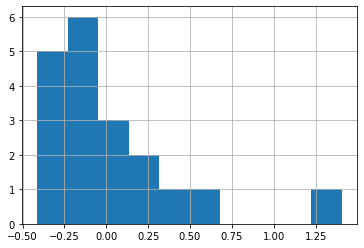

<Figure size 36x36 with 0 Axes>

In [58]:
# control: buy and hold #
control = inf.getHoldReturns('ETCUSD', 1440).iloc[-540:]
print(inf.getSharpe(control, '1M'))

temp_control = control['% change'].iloc[2:] + 1
temp_control = temp_control.resample('1M').prod() - 1

worst_month_control = round(temp_control.min(),3)
print('Worst Month: ', worst_month2)

inf.plotHistogram(control, '1M')

# view monthly returns with code below
# print((control['% change']+1).resample('1M').prod()-1)

Important to note that ETC returns display extreme tail behavior, so Sharpe Ratio perhaps not the best way of comparing returns, and particularly does not capture risk